## Création de votre premier réseau de neurones

Ce notebook permet de créer un premier réseau de neurone qui va classifier des données regroupées de différentes façon en s'inspirant de https://playground.tensorflow.org  
Entrainez-vous sur cette page dans un premier temps puis attaquez le code.


Le code ci-dessous est le code Python permettant de créer votre réseau avec 2 populations séparées (Gaussian)

In [2]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys
import random as rd

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Création des données d'entrainement

In [3]:
datas = []
labels = []
nbr_points = 10000

abs1 = np.random.normal(-2,.75,nbr_points)
ord1 = np.random.normal(-2,.75,nbr_points)
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2])
abss = np.array(abss).ravel()

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()


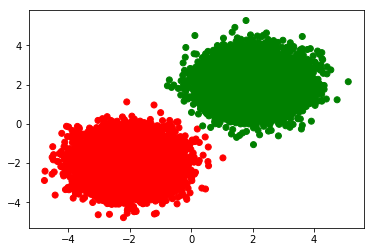

In [4]:
c = ['red','green']
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.show()

In [5]:
datas = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
len(datas)
datas_df = np.array([list(data)+[color] for (data,color) in zip(datas, colors)])

In [6]:
list(datas[0])+[labels[0]]

[-0.37223582582730064, -0.6789014615976987, 0.0]

In [7]:
df = pd.DataFrame(datas_df, columns=['abs','ord','couleur'])
df

abs                  ord couleur
0       -0.37223582582730064  -0.6789014615976987     red
1         -2.900887711976542   -3.264299106834355     red
2        -2.9966216803276575  -0.5531767514057226     red
3        -1.9422861099452438   -3.082343518458497     red
4        -3.2880367741219514  -0.9489052938413332     red
5        -1.8804228680875916  -2.1759323267361745     red
6        -1.8311832263743995  -1.1762110073370216     red
7        -2.1923690798250046  -0.4789936611907015     red
8        -1.6842550774448424  -3.1232755970232886     red
9        -1.7394152632938948  -0.9595076178456483     red
10       -0.8295675545238381  -2.2722176160791223     red
11       -2.6214282860607554  -1.9580363756735535     red
12       -1.0054531924024557  -2.6786534416447854     red
13       -1.4595693578785385    -2.41273590200389     red
14        -2.892144719318872  -1.0722020617294565     red
15       -1.1711210798115794  -1.7693381002822322     red
16        -1.506867362583158  -3.0533330384175787     red
17       -1.8985845284244531  -2.0447758543139507     red
18     -0.058705348036381055  -1.7007186834867796     red
19        -3.092091999020357  -2.4852742046471894     red
20        -0.979153330110742  -1.5255805215324763     red
21       -2.3328614235743568    -1.47126450734627     red
22        -1.464121863801716  -1.6604832847014943     red
23       -2.3441707081352288  -1.8130125210739196     red
24       -2.2086442865273557  -2.0841694448617214     red
25       -1.8630431590771406  -2.0353326289049645     red
26       -3.4753226826459187   -1.325844513740468     red
27       -1.7232120118022036  -0.7770085426350763     red
28       -2.5162237347950276  -2.2819430117808652     red
29       -1.6365178263030855  -3.0793305872521284     red
...                      ...                  ...     ...
19970     3.0123198298298917    2.683468825107775   green
19971     1.4174725207181336    1.796074688191319   green
19972      2.768955954447006    2.384958341014013   green
19973     1.7464735990408973    2.316259662512274   green
19974      2.035801245472493   1.5617304189925387   green
19975     1.9512292673773657    2.264850390547398   green
19976     1.9087743256204976   1.2304731791424892   green
19977      1.297560742882275   0.5182317255554454   green
19978     2.2446651780765614   2.4055021975221567   green
19979     1.8172276901589184   1.3052446408705578   green
19980      2.775622295394471   1.9830000488935033   green
19981     0.7484348551952711    2.405835455337935   green
19982      2.240591624991554    2.479033876086299   green
19983     2.9814842069616274   1.0770208594179025   green
19984      2.317171269890587   1.3605921737912166   green
19985     1.8189764071780083   0.9578419228861528   green
19986     1.1032252090303154   1.0784194412992005   green
19987     1.7840920906671656   1.6925659162591198   green
19988     1.9969671435359058   1.6813392690634172   green
19989     1.9593406417363513   2.4733797443860595   green
19990      2.280007211710222   3.1061096744349816   green
19991     2.1203826661041654   2.5224533385190253   green
19992     1.8345981163389578   2.0564857957487335   green
19993     2.4970058604553795   1.0001235471991397   green
19994       2.94785135325268   3.2035252666050633   green
19995      2.062192869301641   1.4729426863278832   green
19996     1.6176840050794252   1.6090726509525108   green
19997      3.435061834687298   0.7934860432663098   green
19998     1.5605881771642318   3.2102167478472263   green
19999     2.2317056238578523    3.451850009419709   green

[20000 rows x 3 columns]

## Création du modèle

In [8]:
# model creation
model = tf.keras.models.Sequential()

### Ajout d'une couche de 2 neurones

In [9]:
# Add the layers
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

## Exemple de prédiction sans entraînement

In [10]:
# output example
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])

Instructions for updating:
Colocations handled automatically by placer.
[[0.7921023  0.20789774]]
Found :  0
Should be :  0.0


## Résumé du modèle (couche de neurones)

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [12]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [13]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

## Entraînement
On prend par exemple 20% de données de validation, et on entraine le modèle sur 10 epochs

In [14]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 1s 91us/sample - loss: 0.0114 - acc: 1.0000 - val_loss: 0.0094 - val_acc: 1.0000
Epoch 2/10
16000/16000 [==============================] - 1s 82us/sample - loss: 0.0085 - acc: 1.0000 - val_loss: 0.0075 - val_acc: 1.0000
Epoch 3/10
16000/16000 [==============================] - 1s 80us/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 1.0000
Epoch 4/10
16000/16000 [==============================] - 1s 76us/sample - loss: 0.0059 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 1.0000
Epoch 5/10
16000/16000 [==============================] - 1s 83us/sample - loss: 0.0052 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 1.0000
Epoch 6/10
16000/16000 [==============================] - 1s 81us/sample - loss: 0.0046 - acc: 1.0000 - val_loss: 0.0044 - val_acc: 1.0000
Epoch 7/10
16000/16000 [==============================] - 1s 81us/sample - loss: 0.0042 - acc: 1.0000 - val_loss: 0.0

## Résumé de l'entraînement :
* comparaison des données d'entraînement et de validation

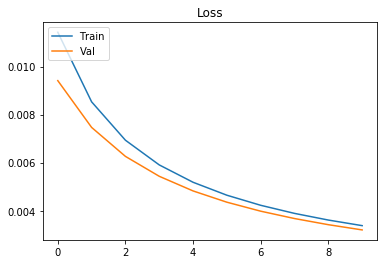

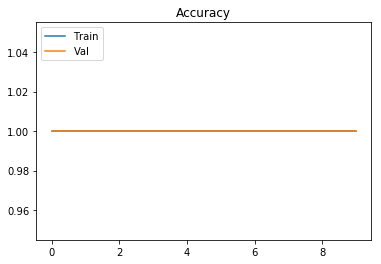

In [15]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## On réalise nos premières prédictions sur des exemples évidents

In [16]:
datas_tests = np.array([[2,2],[-2,-2]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c[index_max(list(el))])
    
res
    

[[4.8845372e-04 9.9951160e-01]
 [9.9961323e-01 3.8683397e-04]]


['green', 'red']

## Sur des exemples moins évidents 
## le modèle donne un résultat mais peu fiable 
## ce qui est normal puisque l'on se trouve aux limites du modèle

In [17]:
c2 = ['darkred','chartreuse']

datas_tests = np.array([[0,0],[2,-2],[4,-4]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c2[index_max(list(el))])
    
res

[[0.5291358  0.47086424]
 [0.45816693 0.54183304]
 [0.38885584 0.6111441 ]]


['darkred', 'chartreuse', 'chartreuse']

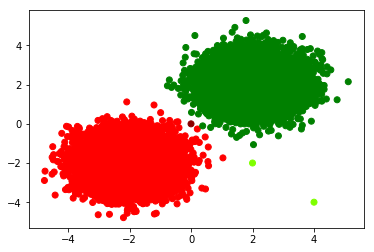

In [18]:
abstest = [ data[0] for data in datas_tests]
ordstest = [ data[1] for data in datas_tests]
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.scatter(abstest,ordstest, color = res)
plt.show()

### Exercice:

Créer un jeu de 2000 données de test comprenant datas et labels, pour tester le modèle précédent

In [19]:
# example
datas_test = np.array([[2,2],[-2,-2]])
labels_test = [1,0]

loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)



2/2 [==============================] - 0s 614us/sample - loss: 4.3770e-04 - acc: 1.0000
Test Loss 0.0004376990254968405
Test Accuracy 1.0


[[4.8845372e-04 9.9951160e-01]
 [9.9961323e-01 3.8683397e-04]]


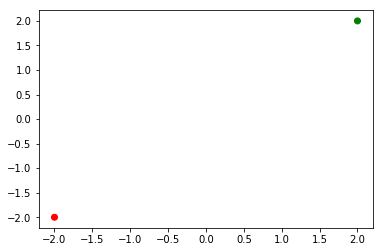

In [20]:

model_output = model.predict(datas_test)
print(model_output)
Colors = [c[index_max(list(model))] for model in model_output]

abstest = [ data[0] for data in datas_test]
ordstest = [ data[1] for data in datas_test]

plt.scatter(abstest,ordstest,color=Colors)

plt.show()


In [25]:
datas = []
labels = []
nbr_points = 2000

abs1 = 3*np.random.normal(-7,0.8,nbr_points)
ord1 = 3*np.random.normal(-6,0.3,nbr_points)
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = 2*np.random.normal(2,.75,nbr_points)
ord2 = 2*np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2])
abss = np.array(abss).ravel()

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()



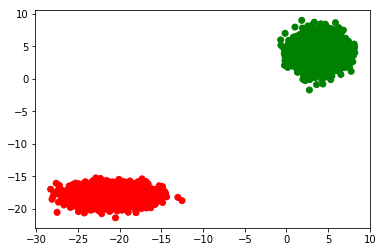

In [26]:
c = ['red','green']
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.show()

## -----------------------------------------------------------------------
## Création d'un second réseau de neurones

Le code ci-dessous est le code Python permettant de créer un réseau de neurones avec 2 populations séparées différemment (Exclusive Or)

### Essayons avec des données un peu moins bien réparties

## Création des données d'entraînement

In [40]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    if x*y >= 0:
        labels.append(0)
    else:
        labels.append(1)
        
datas = np.array(datas)

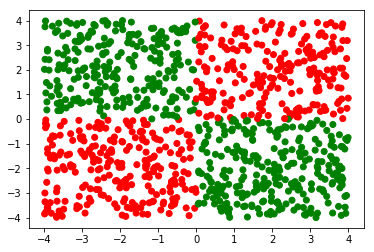

In [41]:
c = ['red','green']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

## Création du modèle

In [42]:
# model creation
model = tf.keras.models.Sequential()

### Ajout des couches de neurones
Il va falloir ajouter une couche de neurones pour complexifier notre modèle, sinon on n'arrivera jamais à obtenir un résultat satisfaisant.

In [43]:
# Add the layers
model.add(tf.keras.layers.Dense(4, activation="relu"))  # si vous avez tester, 4 suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax"))  

## Exemple de prédiction sans entraînement

In [44]:
# output example
print(datas[0:1])
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", c[index_max(list(model_output[0]))])
print("Should be : ", c[labels[0:1][0]])

[[3.93822568 1.73770338]]
[[0.52959675 0.47040328]]
Found :  red
Should be :  red


## Résumé du modèle (couches de neurones)

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  12        
_________________________________________________________________
dense_4 (Dense)              multiple                  10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [ ]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

## Entraînement

In [47]:
history = model.fit(datas, labels, epochs=100, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 0s 273us/sample - loss: 0.7307 - acc: 0.5238 - val_loss: 0.6548 - val_acc: 0.6600
Epoch 2/100
800/800 [==============================] - 0s 92us/sample - loss: 0.6365 - acc: 0.6538 - val_loss: 0.5955 - val_acc: 0.7450
Epoch 3/100
800/800 [==============================] - 0s 54us/sample - loss: 0.5930 - acc: 0.6637 - val_loss: 0.5580 - val_acc: 0.7450
Epoch 4/100
800/800 [==============================] - 0s 111us/sample - loss: 0.5656 - acc: 0.6612 - val_loss: 0.5346 - val_acc: 0.7550
Epoch 5/100
800/800 [==============================] - 0s 111us/sample - loss: 0.5474 - acc: 0.6737 - val_loss: 0.5183 - val_acc: 0.7650
Epoch 6/100
800/800 [==============================] - 0s 126us/sample - loss: 0.5349 - acc: 0.6837 - val_loss: 0.5068 - val_acc: 0.7700
Epoch 7/100
800/800 [==============================] - 0s 118us/sample - loss: 0.5257 - acc: 0.6837 - val_loss: 0.4980 - val_acc: 0.77

## Le modèle est-il bien entraîné ?

In [38]:
datas_test = []
labels_test = []


nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    y = 8 * rd.random() - 4
    datas_test.append([x,y])
    if x*y >= 0:
        labels_test.append(0)
    else:
        labels_test.append(1)
        
datas_test = np.array(datas_test)

In [39]:
loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

1000/1000 [==============================] - 0s 39us/sample - loss: 0.0997 - acc: 0.9840
Test Loss 0.09973233395814896
Test Accuracy 0.984


### Exercice: 
Le résultat n'est pas très satisfaisant. Proposez deux façons d'améliorer la prédiction.

## Troisième réseau de neurones

### sur un exemple encore plus tordu... avec 3 populations

## A vous de jouer

In [96]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    norm_carre = x**2 + y**2
    if norm_carre <= 4:
        labels.append(0)
    elif norm_carre <= 8:
        labels.append(1)
    else:
        labels.append(2)
        
datas = np.array(datas)

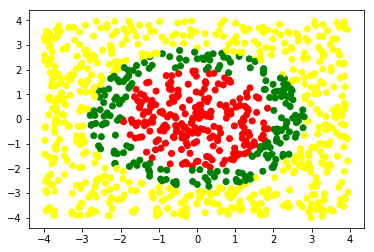

In [97]:
c = ['red','green','yellow']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

### Construire un réseau de neurones correspondant

In [98]:
# model creation
model = tf.keras.models.Sequential()

In [99]:
# Add the layers
model.add(tf.keras.layers.Dense(6, activation="relu"))  
model.add(tf.keras.layers.Dense(6, activation="relu"))  
model.add(tf.keras.layers.Dense(3, activation="softmax")) 

In [100]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [101]:
labels=np.array(labels)
history = model.fit(datas, labels, epochs=100, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 0s 508us/sample - loss: 1.5312 - acc: 0.2500 - val_loss: 1.3094 - val_acc: 0.2500
Epoch 2/100
800/800 [==============================] - 0s 166us/sample - loss: 1.2093 - acc: 0.2537 - val_loss: 1.1238 - val_acc: 0.2950
Epoch 3/100
800/800 [==============================] - 0s 194us/sample - loss: 1.0770 - acc: 0.4100 - val_loss: 1.0365 - val_acc: 0.4950
Epoch 4/100
800/800 [==============================] - 0s 164us/sample - loss: 1.0101 - acc: 0.5125 - val_loss: 0.9895 - val_acc: 0.5850
Epoch 5/100
800/800 [==============================] - 0s 110us/sample - loss: 0.9722 - acc: 0.5725 - val_loss: 0.9613 - val_acc: 0.5850
Epoch 6/100
800/800 [==============================] - 0s 133us/sample - loss: 0.9488 - acc: 0.5725 - val_loss: 0.9419 - val_acc: 0.5850
Epoch 7/100
800/800 [==============================] - 0s 117us/sample - loss: 0.9315 - acc: 0.5725 - val_loss: 0.9259 - val_acc: 0.

In [102]:
datas_test = []
labels_test = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 10 * rd.random() - 2
    abss.append(x)
    y = 10 * rd.random() - 2
    ords.append(y)
    datas_test.append([x,y])
    norm_carre = x**2 + y**2
    if norm_carre <= 4:
        labels_test.append(0)
    elif norm_carre <= 8:
        labels_test.append(1)
    else:
        labels_test.append(2)
        
datas_test = np.array(datas_test)

In [103]:
loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

1000/1000 [==============================] - 0s 37us/sample - loss: 0.1784 - acc: 0.9370
Test Loss 0.1784466552734375
Test Accuracy 0.937


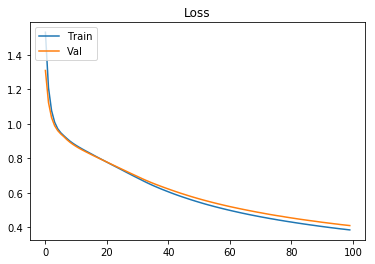

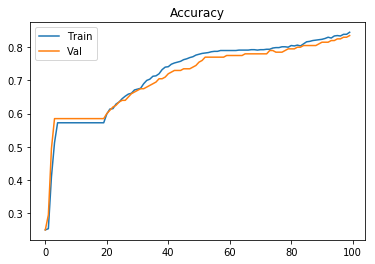

In [104]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()